In [ ]:
#libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#your path to the initial file with \\

df = pd.read_csv("F:\\Study\\Spring19\\DMII\\uci-air-quality\\dm2_data.csv")
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [ ]:
df_work=df
df_work.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


## attribute “PT08.S1(CO)”

In [ ]:
ts=df_work['PT08.S1(CO)']

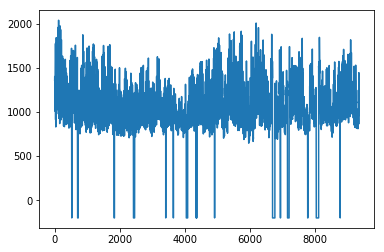

In [ ]:
plt.plot(ts)

In [ ]:
#set datetime index with date and time 
df_work.index = pd.to_datetime(df_work['Date']+' '+df_work['Time'], format='%d/%m/%Y %H:%M:%S', dayfirst=True)

In [ ]:
#Consider only attribute “PT08.S1(CO)”
tra = df_work.loc[:,'PT08.S1(CO)']

In [ ]:
#Split the corresponding time series into daily series, 
#D:по дням

#make groups with pd.Grouper (it works with datetime index)
groups = tra.groupby(pd.Grouper(freq='D'))

#concatenate groups
days = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1)

#set columns by dates
columns = [(x[0]) for x in groups]
days.columns = columns

#чтобы столбцы были днями, а строки - датами
df_work=days.transpose()
#df_work.head()


In [ ]:
df_work.to_csv('F:\\Study\\Spring19\\DMII\\uci-air-quality\\out_3.csv')

In [ ]:
df_work[1].head()

2004-03-10    1292.0
2004-03-11    1136.0
2004-03-12    1044.0
2004-03-13    1196.0
2004-03-14    1484.0
Name: 1, dtype: float64

## Preprocessing and Data Understanding

In [ ]:
#consider different days, for example, day 2(index 1) and 3(index 2)

ts_1=df_work[1]
ts_2=df_work[2]

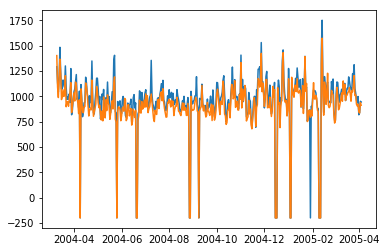

In [ ]:
plt.plot(ts_1)
plt.plot(ts_2)

##### Transformation I: Offset Translation

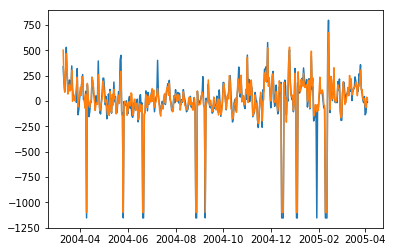

In [ ]:
plt.plot(ts_1 - ts_1.mean())
plt.plot(ts_2 - ts_2.mean())

##### Transformation II: Amplitude Scaling

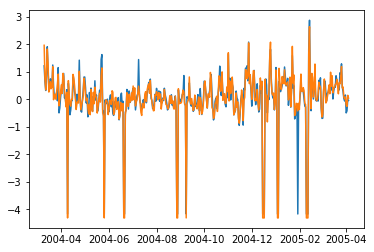

In [ ]:
plt.plot((ts_1 - ts_1.mean()) / ts_1.std() ) 
plt.plot((ts_2 - ts_2.mean()) / ts_2.std() ) 

##### Transformation IV: Noise (smoothing)

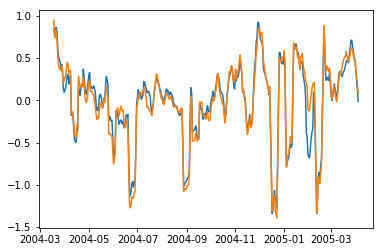

In [ ]:
plt.plot ( ( (ts_1 - ts_1.mean()) / ts_1.std() ).rolling(window=9).mean() )
plt.plot ( ( (ts_2 - ts_2.mean()) / ts_2.std() ).rolling(window=9).mean() ) 

#### Transformation III: Trend removal

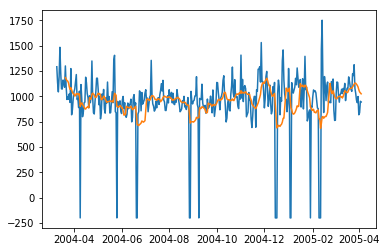

In [ ]:
plt.plot(ts_1)
plt.plot(ts_1.rolling(window=12).mean())

In [ ]:
#смотрим на всякие сдвиги и любуемся

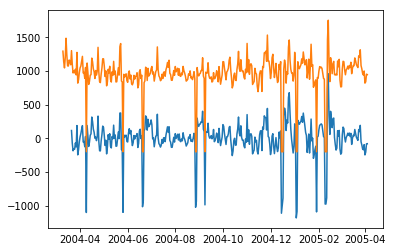

In [ ]:
ts_shift = ts_1 - ts_1.rolling(window=12).mean()
plt.plot( ts_shift )
plt.plot( ts_1 )

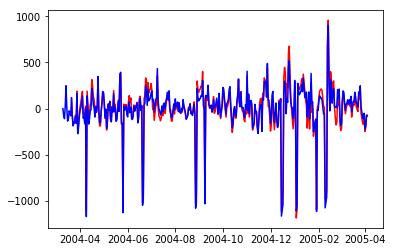

In [ ]:
#Compare simple window smoothing with an exponential decay one (ewm)
ts_shift2 = ts_1 - ts_1.ewm(halflife=12).mean()
plt.plot( ts_shift, 'r-' )
plt.plot( ts_shift2, 'b-' )

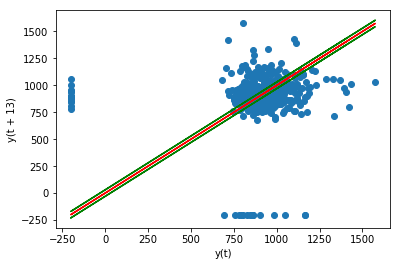

In [ ]:
#Compare each value of s(t) (for all t) with the corresponding value of s(t-L). Default lag_plot function takes L=1

from pandas.plotting import lag_plot
lag_plot(ts_2, lag=13)
# Plot also some reference lines to highlight strong correlation areas
plt.plot(ts_2, ts_2, 'r-')
plt.plot(ts_2, ts_2+30, 'g-')
plt.plot(ts_2, ts_2-30, 'g-')

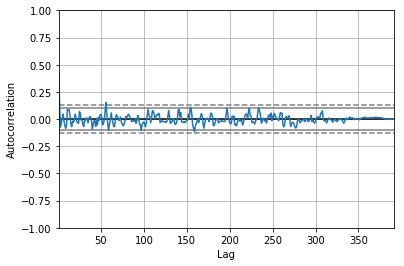

In [ ]:
#Compute autocorrelation for all lag values and plot them. Values outside the drawn bounds (dashed lines) correspond to lags with high autocorrelation.
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(ts_1)

In [ ]:
#The Augmented Dickey-Fuller unit root test (http://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html ). 
#Estimates whether the time series has a time-dependent structure (non-stationary, i.e. affected by trend, seasonality and 
# other phenomena that make the statistics of the time series to vary in time) or not (stationary).

from statsmodels.tsa.stattools import adfuller
ts_shift.dropna(inplace=True) # remove empty values due to rolling

result = adfuller(ts_shift)

print('p-value: %f  (%s)' % (result[1], '< 0.05 => most likely stationary' if result[1]<0.05 \
                             else '> 0.05 => most likely non-stationary'))
print('')
print('ADF Statistic: %f' % result[0])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f \t-->\t %s' % \
          (key, value, "Risk of non-stationarity" if result[0]>value \
           else "OK: most likely stationary"))

p-value: 0.000000  (< 0.05 => most likely stationary)

ADF Statistic: -7.669891
Critical Values:
	1%: -3.448 	-->	 OK: most likely stationary
	5%: -2.869 	-->	 OK: most likely stationary
	10%: -2.571 	-->	 OK: most likely stationary


#### Exploring seasonality with matrix plots (не получилось)

In [ ]:
#df2=df

In [ ]:
#series = df2.loc[:,'PT08.S1(CO)']

In [ ]:
#from pandas import TimeGrouper
#from pandas import DataFrame
#groups = series.groupby(TimeGrouper('A'))
#years = DataFrame()
#for name, group in groups:
#    years[name.year] = group.values
#plt.matshow(years.T, interpolation=None, aspect='auto')

## Missing values

In [ ]:
#df1 = df_work.drop(df_work.loc['2004-03-10'], axis = 1)
#ALARM df1 - no 2004_03_10!!11

#elimination of rows with many missing values
df_work = df_work.drop(df_work.index[0])
df_work = df_work.drop(df_work.index[-1])

In [ ]:
#creation of new column Count

df_work['Count']=0
df_work.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,Count
2004-03-11,1185.0,1136.0,1094.0,1010.0,1011.0,1066.0,1052.0,1144.0,1333.0,1351.0,...,1310.0,1292.0,1383.0,1581.0,1776.0,1640.0,1313.0,965.0,913.0,0
2004-03-12,1080.0,1044.0,988.0,889.0,831.0,847.0,927.0,1091.0,1587.0,1545.0,...,1353.0,1309.0,1274.0,1510.0,1525.0,1843.0,1598.0,1484.0,1677.0,0
2004-03-13,1280.0,1196.0,1184.0,1172.0,1147.0,978.0,1100.0,1112.0,1336.0,1408.0,...,1240.0,1306.0,1326.0,1473.0,1609.0,1611.0,1621.0,1444.0,1418.0,0
2004-03-14,1534.0,1484.0,1367.0,1344.0,1130.0,1062.0,1076.0,1028.0,1155.0,1235.0,...,1258.0,1458.0,1438.0,1478.0,1808.0,1898.0,1560.0,1324.0,1349.0,0
2004-03-15,1239.0,1239.0,1224.0,1078.0,1078.0,1075.0,1157.0,1314.0,1797.0,1961.0,...,1317.0,1318.0,1445.0,1917.0,2040.0,1895.0,1595.0,1439.0,1142.0,0


In [ ]:
#looking for missing values -200, where count is amount of them in each row, mark - amount overall

mark=0
j=388

#по всему массиву, где i -номер строки, меняющийся от 0 до последней
for i in range (0,j):
    #считаем, сколько значений -200 в каждой строке
    count=(df_work.iloc[i,:]==[-200]).sum()
    #записываем в последнюю колонку в нужную строку
    df_work.iloc[i,-1] = count 
    #если были -200 в строке
    if count>0:
        mark=mark+1
        #выводим индекс (в странном виде) и количество пропущенных значений
        print(df_work.index[i], '| Val -200 =', count)
#а всего строк к missing values:
print('Missing values =',mark)

2004-04-01 00:00:00 | Val -200 = 3
2004-04-08 00:00:00 | Val -200 = 1
2004-04-09 00:00:00 | Val -200 = 23
2004-05-25 00:00:00 | Val -200 = 5
2004-05-26 00:00:00 | Val -200 = 9
2004-06-19 00:00:00 | Val -200 = 10
2004-06-20 00:00:00 | Val -200 = 24
2004-06-21 00:00:00 | Val -200 = 4
2004-07-31 00:00:00 | Val -200 = 1
2004-08-09 00:00:00 | Val -200 = 4
2004-08-26 00:00:00 | Val -200 = 18
2004-08-27 00:00:00 | Val -200 = 24
2004-08-28 00:00:00 | Val -200 = 3
2004-09-07 00:00:00 | Val -200 = 1
2004-09-08 00:00:00 | Val -200 = 17
2004-10-01 00:00:00 | Val -200 = 1
2004-12-14 00:00:00 | Val -200 = 7
2004-12-15 00:00:00 | Val -200 = 24
2004-12-16 00:00:00 | Val -200 = 24
2004-12-17 00:00:00 | Val -200 = 20
2004-12-24 00:00:00 | Val -200 = 5
2005-01-02 00:00:00 | Val -200 = 3
2005-01-03 00:00:00 | Val -200 = 24
2005-01-04 00:00:00 | Val -200 = 24
2005-01-05 00:00:00 | Val -200 = 1
2005-01-28 00:00:00 | Val -200 = 7
2005-01-29 00:00:00 | Val -200 = 2
2005-02-08 00:00:00 | Val -200 = 7
2005-02-0

In [ ]:
#elimination of rows with value -200 in more than 7 cases


index=0

for i in df_work['Count']:
    if i>7:
        #будем удалять строку, коли в ней больше 7 (>30%) missing values
        print(df_work.index[index], index)
        df_work = df_work.drop(df_work.index[index])
    else:
        index=index+1

2004-04-09 00:00:00 29
2004-05-26 00:00:00 75
2004-06-19 00:00:00 98
2004-06-20 00:00:00 98
2004-08-26 00:00:00 164
2004-08-27 00:00:00 164
2004-09-08 00:00:00 175
2004-12-15 00:00:00 272
2004-12-16 00:00:00 272
2004-12-17 00:00:00 272
2005-01-03 00:00:00 288
2005-01-04 00:00:00 288
2005-02-09 00:00:00 323
2005-02-10 00:00:00 323
2005-02-11 00:00:00 323


In [ ]:
#по всему массиву, где i -номер строки, меняющийся от 0 до последней
for i in range (df_work[0].size):
    for j in range(0,23):
        if df_work.iloc[i][j]==-200:
            df_work.iloc[i,j]=(df_work.iloc[i-1][j]+df_work.iloc[i+1][j]+df_work.iloc[i][j+1]+df_work.iloc[i][j-1])/4
            
for i in range (df_work[0].size):
    if df_work.iloc[i][0]==-200:
        df_work.iloc[i,0]=(df_work.iloc[i-1][j]+df_work.iloc[i+1][j]+df_work.iloc[i][j+1])/3 
    if df_work.iloc[i][23]==-200:
        df_work.iloc[i,23]=(df_work.iloc[i-1][j]+df_work.iloc[i+1][j]+df_work.iloc[i][j-1])/3

In [ ]:
df_work.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 374 entries, 2004-03-11 to 2005-04-03
Data columns (total 25 columns):
0        374 non-null float64
1        374 non-null float64
2        374 non-null float64
3        374 non-null float64
4        374 non-null float64
5        374 non-null float64
6        374 non-null float64
7        374 non-null float64
8        374 non-null float64
9        374 non-null float64
10       374 non-null float64
11       374 non-null float64
12       374 non-null float64
13       374 non-null float64
14       374 non-null float64
15       374 non-null float64
16       374 non-null float64
17       374 non-null float64
18       374 non-null float64
19       374 non-null float64
20       374 non-null float64
21       374 non-null float64
22       374 non-null float64
23       374 non-null float64
Count    374 non-null int64
dtypes: float64(24), int64(1)
memory usage: 76.0 KB


In [ ]:
df_work.loc['2004-04-01']

0        1143.000000
1        1044.000000
2        1034.000000
3         956.000000
4         909.000000
5         996.000000
6        1154.000000
7        1510.000000
8        1722.000000
9        1512.000000
10       1258.000000
11       1094.000000
12       1129.000000
13       1125.000000
14        894.250000
15        841.312500
16       1155.328125
17       1308.000000
18       1529.000000
19       1592.000000
20       1536.000000
21       1192.000000
22       1186.000000
23       1203.000000
Count       3.000000
Name: 2004-04-01 00:00:00, dtype: float64

In [ ]:
# глупая проверочка, можно выкинуть

for i in range (df_work[0].size):
    for j in (0,23):
        if df_work[j][i]==-200:
            print(df_work.index[i],'У меня еще есть ЗЛО')

In [ ]:
df_work.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,Count
2004-03-11,1185.0,1136.0,1094.0,1010.0,1011.0,1066.0,1052.0,1144.0,1333.0,1351.0,...,1310.0,1292.0,1383.0,1581.0,1776.0,1640.0,1313.0,965.0,913.0,0
2004-03-12,1080.0,1044.0,988.0,889.0,831.0,847.0,927.0,1091.0,1587.0,1545.0,...,1353.0,1309.0,1274.0,1510.0,1525.0,1843.0,1598.0,1484.0,1677.0,0
2004-03-13,1280.0,1196.0,1184.0,1172.0,1147.0,978.0,1100.0,1112.0,1336.0,1408.0,...,1240.0,1306.0,1326.0,1473.0,1609.0,1611.0,1621.0,1444.0,1418.0,0
2004-03-14,1534.0,1484.0,1367.0,1344.0,1130.0,1062.0,1076.0,1028.0,1155.0,1235.0,...,1258.0,1458.0,1438.0,1478.0,1808.0,1898.0,1560.0,1324.0,1349.0,0
2004-03-15,1239.0,1239.0,1224.0,1078.0,1078.0,1075.0,1157.0,1314.0,1797.0,1961.0,...,1317.0,1318.0,1445.0,1917.0,2040.0,1895.0,1595.0,1439.0,1142.0,0


### Life without missing values. Some analysis

In [ ]:
#df_work=df_work.drop(['Mean_row'], axis=1)
df_work=df_work.drop(['Count'], axis=1)

In [ ]:
df_work.to_csv('F:\\Study\\Spring19\\DMII\\uci-air-quality\\output.csv')

In [ ]:
# Что нам интересно? Смотрять как менялось значение в течении дня или в одинаковый час в разные дни?

# по дню:
ts_3=df_work.iloc[1]
ts_4=df_work.iloc[2]

In [ ]:
#df_work.iloc[1]
df_work.iloc[2]

0     1280.0
1     1196.0
2     1184.0
3     1172.0
4     1147.0
5      978.0
6     1100.0
7     1112.0
8     1336.0
9     1408.0
10    1447.0
11    1542.0
12    1451.0
13    1328.0
14    1207.0
15    1240.0
16    1306.0
17    1326.0
18    1473.0
19    1609.0
20    1611.0
21    1621.0
22    1444.0
23    1418.0
Name: 2004-03-13 00:00:00, dtype: float64

In [ ]:
# по часу
ts_1=df_work[1]
ts_2=df_work[2]

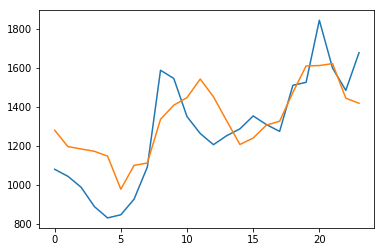

In [ ]:
plt.plot(ts_3)
plt.plot(ts_4)

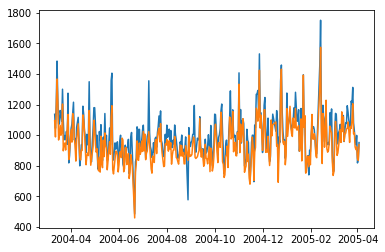

In [ ]:
plt.plot(ts_1)
plt.plot(ts_2)

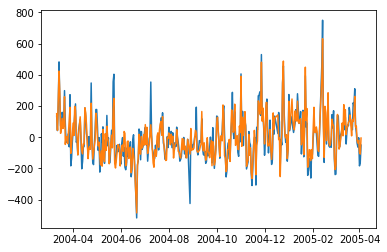

In [ ]:
#Transformation I

plt.plot(ts_1 - ts_1.mean())
plt.plot(ts_2 - ts_2.mean())

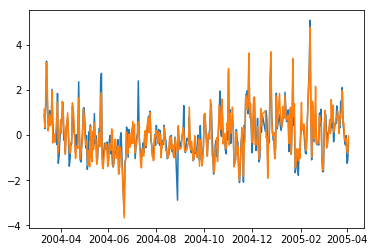

In [ ]:
#Transformation II

plt.plot((ts_1 - ts_1.mean()) / ts_1.std() ) 
plt.plot((ts_2 - ts_2.mean()) / ts_2.std() ) 

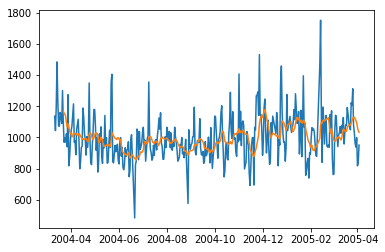

In [ ]:
#trabsformation III

plt.plot(ts_1)
plt.plot(ts_1.rolling(window=12).mean())

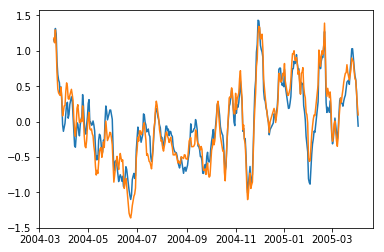

In [ ]:
# transformation IV

plt.plot ( ( (ts_1 - ts_1.mean()) / ts_1.std() ).rolling(window=9).mean() )
plt.plot ( ( (ts_2 - ts_2.mean()) / ts_2.std() ).rolling(window=9).mean() ) 

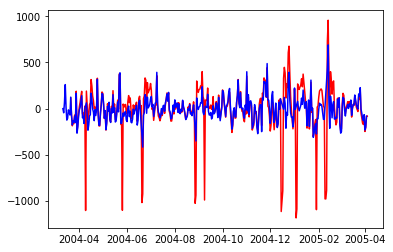

In [ ]:
#Compare simple window smoothing with an exponential decay one (ewm)
ts_shift2 = ts_1 - ts_1.ewm(halflife=12).mean()
plt.plot( ts_shift, 'r-' )
plt.plot( ts_shift2, 'b-' )

In [ ]:
#рандомно выбрала 6 день для построения, может, будет интереснее посмотреть закономерность изменения
# поведения графиков после работы над missing values
ts_new=df_work[2]

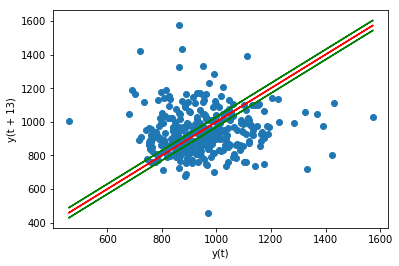

In [ ]:
#Compare each value of s(t) (for all t) with the corresponding value of s(t-L). Default lag_plot function takes L=1

from pandas.plotting import lag_plot
lag_plot(ts_new, lag=13)
# Plot also some reference lines to highlight strong correlation areas
plt.plot(ts_new, ts_new, 'r-')
plt.plot(ts_new, ts_new+30, 'g-')
plt.plot(ts_new, ts_new-30, 'g-')

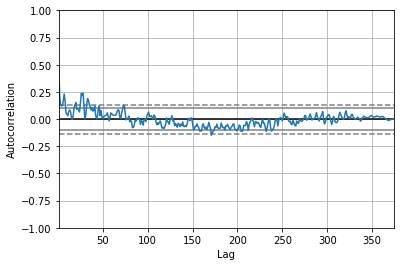

In [ ]:
#Compute autocorrelation for all lag values and plot them. Values outside the drawn bounds (dashed lines) correspond to lags with high autocorrelation.
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(ts_new)

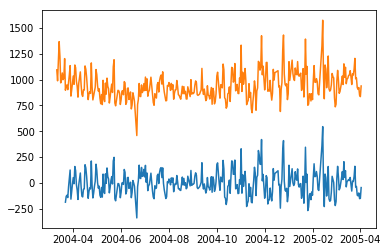

In [ ]:
ts_shift_new = ts_new - ts_new.rolling(window=12).mean()
plt.plot(ts_shift_new)
plt.plot(ts_new)

In [ ]:
#The Augmented Dickey-Fuller unit root test (http://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html ). 
#Estimates whether the time series has a time-dependent structure (non-stationary, i.e. affected by trend, seasonality and 
# other phenomena that make the statistics of the time series to vary in time) or not (stationary).

from statsmodels.tsa.stattools import adfuller
ts_shift.dropna(inplace=True) # remove empty values due to rolling

result = adfuller(ts_shift)

print('p-value: %f  (%s)' % (result[1], '< 0.05 => most likely stationary' if result[1]<0.05 \
                             else '> 0.05 => most likely non-stationary'))
print('')
print('ADF Statistic: %f' % result[0])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f \t-->\t %s' % \
          (key, value, "Risk of non-stationarity" if result[0]>value \
           else "OK: most likely stationary"))

p-value: 0.000000  (< 0.05 => most likely stationary)

ADF Statistic: -7.669891
Critical Values:
	1%: -3.448 	-->	 OK: most likely stationary
	5%: -2.869 	-->	 OK: most likely stationary
	10%: -2.571 	-->	 OK: most likely stationary


## Clustering


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

##### Normalization

In [ ]:
scaler = StandardScaler()
scaler.fit(df_work.values)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
df_work.values

array([[1185., 1136., 1094., ..., 1313.,  965.,  913.],
       [1080., 1044.,  988., ..., 1598., 1484., 1677.],
       [1280., 1196., 1184., ..., 1621., 1444., 1418.],
       ...,
       [ 848.,  818.,  848., ...,  823.,  835.,  893.],
       [ 965.,  838.,  835., ...,  885.,  891.,  904.],
       [ 929.,  951.,  938., ..., 1102., 1116., 1100.]])

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df_work.values)

In [ ]:
X[:5]

array([[0.59855266, 0.51445771, 0.56975995, 0.43014439, 0.39568345,
        0.47724477, 0.49749373, 0.47596154, 0.59652174, 0.52859351,
        0.51179673, 0.49325626, 0.51254826, 0.59381443, 0.62310606,
        0.67364939, 0.59378851, 0.58920902, 0.71418389, 0.81858787,
        0.75655176, 0.60162777, 0.35266007, 0.20901246],
       [0.51856789, 0.44182374, 0.47474861, 0.2762325 , 0.17985612,
        0.20787208, 0.34085213, 0.425     , 0.8173913 , 0.67851623,
        0.61796733, 0.57418112, 0.48359073, 0.55876289, 0.54356061,
        0.72105843, 0.61054967, 0.50504319, 0.66357805, 0.64610892,
        0.90407412, 0.83286216, 0.77793782, 0.94151486],
       [0.67091982, 0.56182769, 0.65042996, 0.63620825, 0.558753  ,
        0.36900369, 0.55764411, 0.44519231, 0.59913043, 0.57264297,
        0.70598911, 0.84296724, 0.72007722, 0.6371134 , 0.46780303,
        0.59647189, 0.60759182, 0.5451957 , 0.63720599, 0.70383096,
        0.73547713, 0.85152318, 0.74516111, 0.69319271],
       [0.864

### K-means

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# DTW func with 2 parameters
def DTWDistance(s1, s2):
    DTW={}

    for i in range(len(s1)):
        DTW[(i, -1)] = float('inf')
    for i in range(len(s2)):
        DTW[(-1, i)] = float('inf')
    DTW[(-1, -1)] = 0

    for i in range(len(s1)):
        for j in range(len(s2)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])

    return sqrt(DTW[len(s1)-1, len(s2)-1])

In [ ]:
def LB_Keogh(s1,s2,r):
    LB_sum=0
    for ind,i in enumerate(s1):
        
        lower_bound=min(s2[(ind-r if ind-r>=0 else 0):(ind+r)])
        upper_bound=max(s2[(ind-r if ind-r>=0 else 0):(ind+r)])
        
        if i>upper_bound:
            LB_sum=LB_sum+(i-upper_bound)**2
        elif i<lower_bound:
            LB_sum=LB_sum+(i-lower_bound)**2
    
    return sqrt(LB_sum)

In [ ]:
# now index consistes of numbers

ind=[]
for i in range(0,len(df_work[0])):
    ind.append(i)
df_work.index=ind


In [ ]:
# DTW func with 3 parameters
def DTWDistance2(s1, s2,w):
    DTW={}
    
    w = max(w, abs(len(s1)-len(s2)))
    
    for i in range(-1,len(s1)):
        for j in range(-1,len(s2)):
            DTW[(i, j)] = float('inf')
    DTW[(-1, -1)] = 0
  
    for i in range(len(s1)):
        for j in range(max(0, i-w), min(len(s2), i+w)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])

    return sqrt(DTW[len(s1)-1, len(s2)-1])

In [ ]:
def k_means_clust(data,num_clust,num_iter,w=5):
    df_work['K_DTW']=0
    centroids=random.sample(data,num_clust)
    counter=0
    for n in range(num_iter):
        counter+=1
        #print(counter)
        assignments={}
        #assign data points to clusters
        for ind,i in enumerate(data):
            min_dist=float('inf')
            closest_clust=None
            #print('ind=',ind)
            for c_ind,j in enumerate(centroids):
                if LB_Keogh(i,j,5)<min_dist:
                    cur_dist=DTWDistance2(i,j,w)
                    if cur_dist<min_dist:
                        min_dist=cur_dist
                        closest_clust=c_ind
                
            if closest_clust in assignments:
                #print('Hey:', closest_clust)
                if closest_clust==None:
                    df_work['K_DTW'][ind]=0
                else:
                    df_work['K_DTW'][ind]=int(closest_clust)
                assignments[closest_clust].append(ind)
            else:
                assignments[closest_clust]=[]
  
        #recalculate centroids of clusters
        
        for key in assignments:
            if key!=None:
                clust_sum=0
                for k in assignments[key]:
                    clust_sum=clust_sum+data[k]                    
                centroids[key]=[m/len(assignments[key]) for m in clust_sum]
                
    return centroids

In [ ]:
import random
from math import sqrt

In [ ]:
df_work.to_csv('F:\\Study\\Spring19\\DMII\\uci-air-quality\\out_withoutmissing.csv',index=False)

In [ ]:
# сгрузила данные и скачала снова, потому что надо использовать np, чтобы фция работала
data = np.genfromtxt('F:\\Study\\Spring19\\DMII\\uci-air-quality\\out_withoutmissing.csv', delimiter=',')

F:\Programs\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


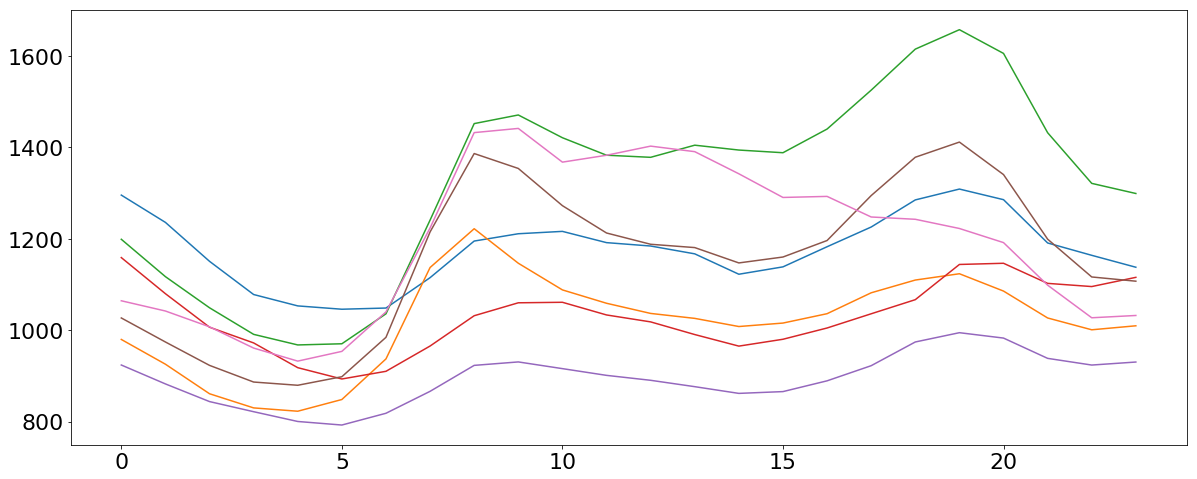

In [ ]:
# Illustration of clusters
plt.figure(figsize=(20, 8))
centroids=k_means_clust(list(data),7,10,4)
for i in centroids:
    plt.plot(i)
plt.tick_params(axis='both', which='major', labelsize=22)   
plt.show()

## KMeans with euclidean function

In [ ]:
kmeans = KMeans(n_clusters=7, n_init=10, max_iter=800)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=800,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [ ]:
kmeans.labels_[:15]

array([1, 4, 5, 5, 4, 4, 4, 4, 4, 4, 1, 2, 2, 2, 6])

In [ ]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]),
 array([75, 38, 78, 72, 44, 11, 56], dtype=int64))

In [ ]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 75, 1: 38, 2: 78, 3: 72, 4: 44, 5: 11, 6: 56}

In [ ]:
X=X.transpose()

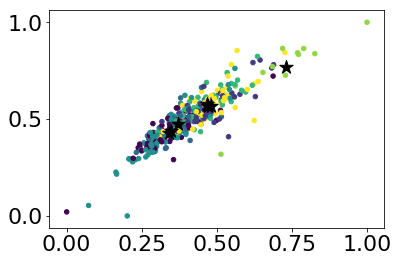

In [ ]:
# Illustration of clustering itself
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(X[1], X[0], c=kmeans.labels_, s=20)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

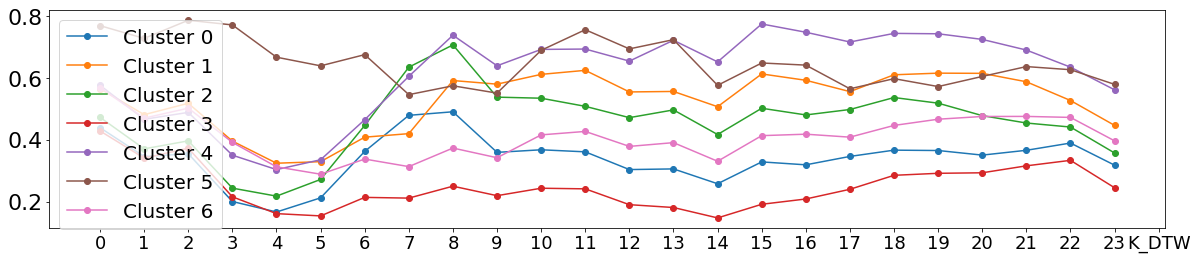

In [ ]:
# Illustration of centroids
plt.figure(figsize=(20, 4))
for i in range(0, len(kmeans.cluster_centers_)):
    plt.plot(kmeans.cluster_centers_[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(df_work.columns)), df_work.columns, fontsize=18)
plt.legend(fontsize=20)
plt.show()

In [ ]:
df_work['K_EU']=kmeans.labels_

In [ ]:
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X.transpose(), kmeans.labels_))

SSE 83.98146551262163
Silhouette 0.1710798880597944


In [ ]:
# Evaluation. SSE
sse_list = list()
max_k = 13
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X)
    
    sse = kmeans.inertia_
    sse_list.append(sse)

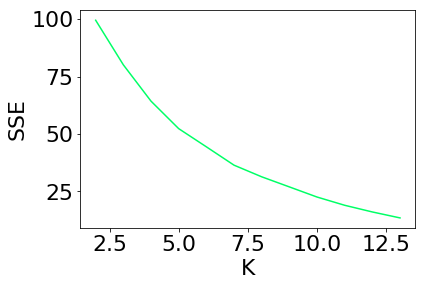

In [ ]:
plt.plot(range(2, len(sse_list) + 2), sse_list, color='#00FF66')
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

In [ ]:
import sklearn

In [ ]:
sklearn.metrics.silhouette_score(X, kmeans.labels_, metric='euclidean', sample_size=None, random_state=None)

0.2316074524365969

In [ ]:
#scaler.inverse_transform(scaler.transform(df_work.values))
silh_list = list()
max_k = 13
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X)
    
    silh = sklearn.metrics.silhouette_score(X, kmeans.labels_, metric='euclidean', sample_size=None, random_state=None)
    silh_list.append(silh)

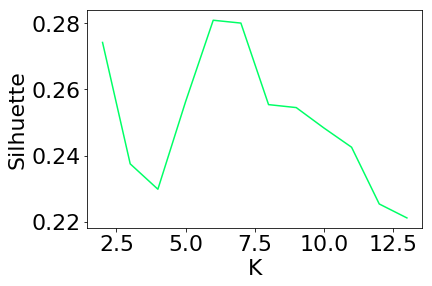

In [ ]:
# Evaluation, Silhuette

plt.plot(range(2, len(silh_list) + 2), silh_list, color='#00FF66')
plt.ylabel('Silhuette', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

## Hierarchical


In [ ]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

In [ ]:
# new dataset to avoid mistakes and usage of clusters
da=df_work.copy()
da=da.drop(['K_DTW'], axis=1)
da = da.drop(['K_EU'], axis = 1)
#da = da.drop(['HI_EU'], axis = 1)

In [ ]:
da.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,HI_EU,HI_DTW
0,1185.0,1136.0,1094.0,1010.0,1011.0,1066.0,1052.0,1144.0,1333.0,1351.0,...,1292.0,1383.0,1581.0,1776.0,1640.0,1313.0,965.0,913.0,0,2
1,1080.0,1044.0,988.0,889.0,831.0,847.0,927.0,1091.0,1587.0,1545.0,...,1309.0,1274.0,1510.0,1525.0,1843.0,1598.0,1484.0,1677.0,0,3
2,1280.0,1196.0,1184.0,1172.0,1147.0,978.0,1100.0,1112.0,1336.0,1408.0,...,1306.0,1326.0,1473.0,1609.0,1611.0,1621.0,1444.0,1418.0,0,3
3,1534.0,1484.0,1367.0,1344.0,1130.0,1062.0,1076.0,1028.0,1155.0,1235.0,...,1458.0,1438.0,1478.0,1808.0,1898.0,1560.0,1324.0,1349.0,0,1
4,1239.0,1239.0,1224.0,1078.0,1078.0,1075.0,1157.0,1314.0,1797.0,1961.0,...,1318.0,1445.0,1917.0,2040.0,1895.0,1595.0,1439.0,1142.0,0,4


In [ ]:
X = scaler.fit_transform(da.values)

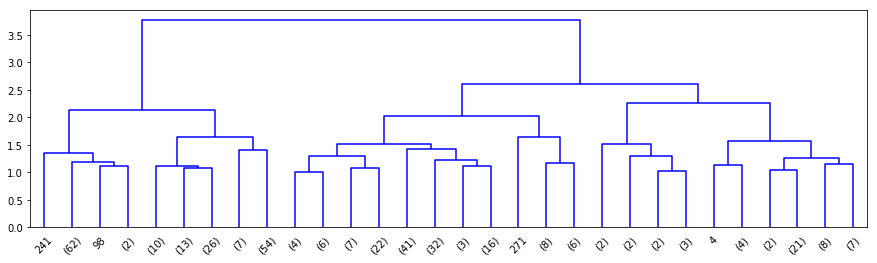

In [ ]:
#Hierarchical euclidean
plt.figure(figsize=(15, 4))
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, color_threshold=1.0, truncate_mode='lastp')

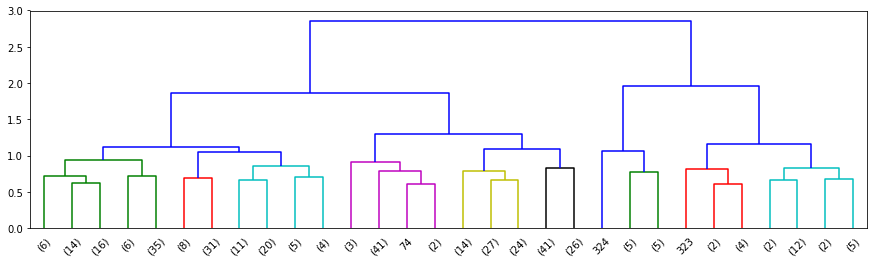

In [ ]:
#Hierarchical DTW
plt.figure(figsize=(15, 4))
data_dist_DTW = pdist(X, DTWDistance)
data_link_DTW = linkage(data_dist_DTW, method='complete', metric='DTWDistance')
res = dendrogram(data_link_DTW, color_threshold=1.0, truncate_mode='lastp')

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')  
cluster.fit_predict(m)

F:\Programs\lib\site-packages\sklearn\cluster\hierarchical.py:417: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([1, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 4, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 0, 1, 1, 1, 0, 0, 1, 4, 1, 1, 4, 3, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 3, 4, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances

In [ ]:
# matrix of pairwise distances with DTW
m = pairwise_distances(X, X, metric=DTWDistance)
print(m)

[[0.         0.74770043 0.57563707 ... 1.33437129 0.99353859 1.02481809]
 [0.74770043 0.         0.57437455 ... 1.58260567 1.2007532  1.20124936]
 [0.57563707 0.57437455 0.         ... 1.80554478 1.36675806 1.2760697 ]
 ...
 [1.33437129 1.58260567 1.80554478 ... 0.         0.52700689 0.70039515]
 [0.99353859 1.2007532  1.36675806 ... 0.52700689 0.         0.24119781]
 [1.02481809 1.20124936 1.2760697  ... 0.70039515 0.24119781 0.        ]]


In [ ]:
cluster_DTW = AgglomerativeClustering(n_clusters=5, affinity='precomputed', linkage='complete')  
cluster_DTW.fit_predict(m)

array([1, 0, 0, 2, 0, 0, 0, 1, 1, 1, 2, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 1,
       0, 0, 1, 1, 1, 3, 1, 1, 3, 4, 1, 1, 1, 0, 1, 3, 3, 1, 1, 1, 1, 1,
       4, 3, 1, 1, 0, 0, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3,
       3, 1, 1, 1, 1, 2, 1, 4, 4, 3, 3, 4, 4, 3, 1, 4, 3, 3, 3, 4, 3, 3,
       3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 4, 3, 1, 1, 3, 3, 3, 3, 1, 1, 1, 3,
       3, 3, 3, 3, 1, 1, 1, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 4, 4,
       4, 3, 3, 3, 3, 4, 4, 4, 3, 3, 4, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3,
       3, 1, 1, 1, 1, 1, 3, 3, 4, 3, 1, 1, 1, 1, 1, 4, 3, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 3, 3, 4, 3, 1, 3, 4, 1, 1, 0, 2, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 4, 3, 4, 3, 3, 3, 4,
       4, 3, 1, 1, 0, 4, 3, 0, 0, 2, 1, 0, 2, 1, 1, 1, 1, 0, 0, 1, 3, 3,
       3, 1, 3, 4, 3, 1, 1, 0, 3, 1, 3, 4, 4, 0, 2, 2, 1, 3, 1, 4, 4, 4,
       1, 3, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 3, 1,

In [ ]:
df_work['HI_EU']=cluster.fit_predict(X)
df_work['HI_DTW']=cluster_DTW.fit_predict(m)


In [ ]:
df_work.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,K_DTW,K_EU,HI_EU,HI_DTW
0,1185.0,1136.0,1094.0,1010.0,1011.0,1066.0,1052.0,1144.0,1333.0,1351.0,...,1581.0,1776.0,1640.0,1313.0,965.0,913.0,0,1,0,1
1,1080.0,1044.0,988.0,889.0,831.0,847.0,927.0,1091.0,1587.0,1545.0,...,1510.0,1525.0,1843.0,1598.0,1484.0,1677.0,0,4,1,0
2,1280.0,1196.0,1184.0,1172.0,1147.0,978.0,1100.0,1112.0,1336.0,1408.0,...,1473.0,1609.0,1611.0,1621.0,1444.0,1418.0,0,5,1,0
3,1534.0,1484.0,1367.0,1344.0,1130.0,1062.0,1076.0,1028.0,1155.0,1235.0,...,1478.0,1808.0,1898.0,1560.0,1324.0,1349.0,2,5,3,2
4,1239.0,1239.0,1224.0,1078.0,1078.0,1075.0,1157.0,1314.0,1797.0,1961.0,...,1917.0,2040.0,1895.0,1595.0,1439.0,1142.0,2,4,1,0


In [ ]:
corr_matrix=df_work[['K_DTW','K_EU','HI_EU','HI_DTW']].corr()

In [ ]:
corr_matrix

,K_DTW,K_EU,HI_EU,HI_DTW
K_DTW,1.000000,-0.019738,0.158647,0.166057
K_EU,-0.019738,1.000000,0.181503,-0.275618
HI_EU,0.158647,0.181503,1.000000,0.629321
HI_DTW,0.166057,-0.275618,0.629321,1.000000


In [ ]:
import seaborn as sns

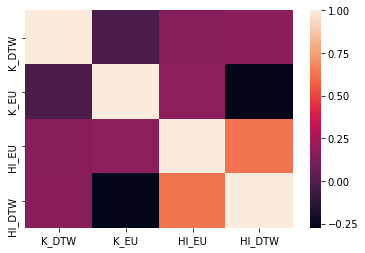

In [ ]:
sns.heatmap(corr_matrix)